<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/KMeans_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [61]:
centers=[(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std=[1,1,1,1]
x,y=make_blobs(n_samples=200,n_features=2,centers=centers, cluster_std=cluster_std)

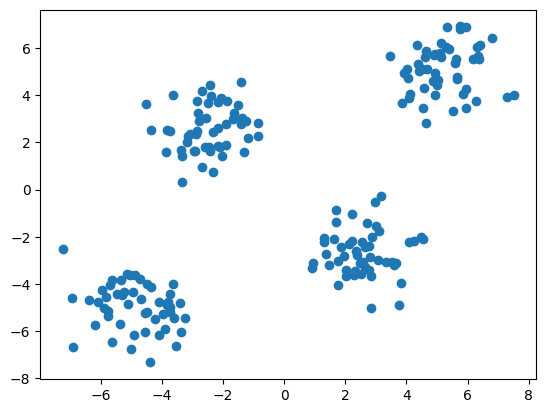

In [62]:
plt.scatter(x[:,0],x[:,1])

In [155]:
class Kmean():
    def __init__(self,n_clusters=2,max_iterations=100):
        self.n_clusters=n_clusters
        self.max_iterations=max_iterations
        self.centroids=None
    def fit_predict(self,x):
        self.centroids=x[random.sample(range(0,x.shape[0]),self.n_clusters)]
        for iter in range(self.max_iterations):
            self.clusters=self.make_cluster(x,self.centroids)
            old_cntr=self.centroids
            # now calculating new centroids
            self.centroids=self.new_centroids(x,self.clusters)
            ## check condition
            if (self.centroids==old_cntr).all:
                break
        self.map_dic={}
        for h in np.unique(self.clusters):
            self.map_dic[h]=self.centroids[h]
        # print(self.map_dic)
        return self.clusters

    def make_cluster(self,x,centroids):
        ## calculate distance
        cluster=[]
        for i in x:
            distance1=[]
            for j in self.centroids:
                distance1.append(np.sqrt(np.dot(i-j,i-j)))
            distance_min=min(distance1)
            index_min_distance=distance1.index(distance_min)
            cluster.append(index_min_distance)
        return np.array(cluster)
    def new_centroids(self,x,cluster):
        new_centroid1=[]
        for a in np.unique(cluster):
            new_centroid1.append(x[cluster==a].mean(axis=0))
        return np.array(new_centroid1)
    def interia(self,x):
        distance_square_sum_super=[]
        for k in np.unique(self.clusters):
            distance_square_sum_sub=[]
            for p in x[self.clusters==k]:
                distance_square_sum_sub.append((p-self.centroids[k])**2)
            distance_square_sum_super.append(np.array(distance_square_sum_sub).sum())
        self.final_sum=np.array(distance_square_sum_super).sum()
        return self.final_sum



In [156]:
r=Kmean(n_clusters=2,max_iterations=200)

In [157]:
r.fit_predict(x)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1])

In [147]:
for i in range (1,11):r.interia(x)

3552.0230673538836

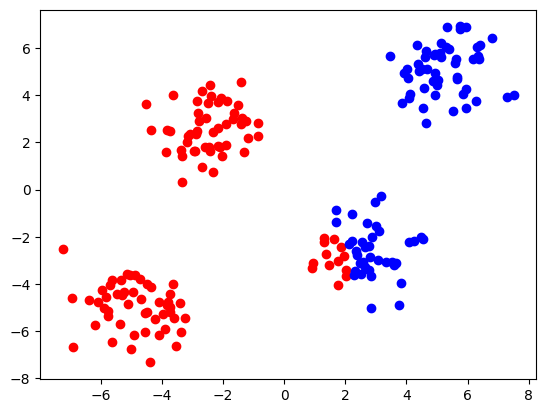

In [99]:
plt.scatter(x[y_pred_clusters==0,0],x[y_pred_clusters==0,1],color='red')
plt.scatter(x[y_pred_clusters==1,0],x[y_pred_clusters==1,1],color='blue')
plt.scatter(x[y_pred_clusters==2,0],x[y_pred_clusters==2,1],color='orange')
plt.scatter(x[y_pred_clusters==3,0],x[y_pred_clusters==3,1],color='yellow')

In [158]:
### adding elbow method
wcss=[]
for i in range(1,11):
    km1=Kmean(n_clusters=i,max_iterations=100)
    km1.fit_predict(x)
    wcss.append(km1.interia(x))

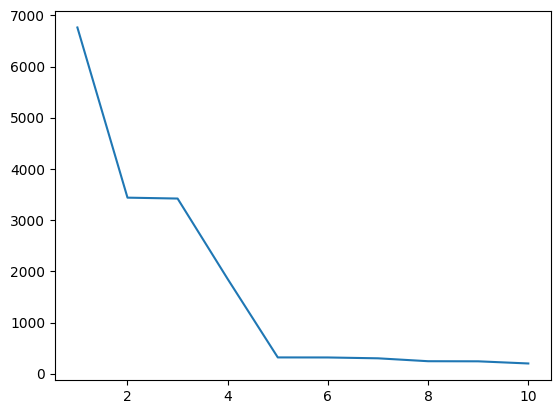

In [159]:
plt.plot(range(1,11),wcss)